# Asymptotics of Localized Solutions of the One-Dimensional Wave Equation with Variable Velocity

#### Equestions
$\begin{cases} 
    \mu^2u_{tt}(x, t) + \mu^2\frac{\partial}{\partial x} c(x) \frac{\partial}{\partial x} u(x, t) = 0\\
    u_{t=0} = V(\frac{x}{\mu} - \frac{a}{\mu}) \\
    u_{t, t=0} = 0
\end{cases}$

#### Characteristics
$\begin{cases}
    \dot{x} = \pm c(x) \\
    x_{t=0} = a
\end{cases}$

#### Theorem
$
\textbf{1. }
    u(x, t) = \frac{1}{2}\Sigma_{\pm}{\sqrt{\frac{c_0}{c(X^{\pm}(t))}}
        V(\frac{c_0 \cdot (x-X^{\pm}(t)}{c(X^{\pm}(t))\cdot\mu}} + O(\mu|log\mu|)
$

$
\textbf{2. }
    u(x,t) = \frac{1}{2}\Sigma_{\pm}\sqrt{\frac{c_0}{c(x)}} 
    V(\frac{c_0(T^{\pm}(x)\mp t)}{\mu}) + O(\mu|log\mu|)
$

$    T^{\pm}(X(t, a)) = \pm\int\limits_a^{X^{\pm}(t, a)}\frac{dx}{c(x)}$

## Функции Задающие систему


In [254]:
import numpy as np
from matplotlib import pyplot as plt

def H(x):
    q =np.sqrt(1+8*np.exp(x))
    return (2*q/(1+q))**2
    
def c(x):
    return np.sqrt(H(x))


def V(y):
  return 3*np.exp(-y**2)

## Формула 1
$
\textbf{1. }
    u(x, t) = \frac{1}{2}\Sigma_{\pm}{\sqrt{\frac{c_0}{c(X^{\pm}(t))}}
        V(\frac{c_0 \cdot (x-X^{\pm}(t)}{c(X^{\pm}(t))\cdot\mu}} + O(\mu|log\mu|)
$

In [255]:
# Solution


def X(sgn, t):
  if np.abs(sgn) != 1:
      raise Exception("|sgn| != 1")
  global a
  q = np.sqrt(1+8*np.exp(a)) - 1
  et = np.exp(sgn*t)
  X = lambda et: np.log(et*q*(2+et*q)/8)
  #print(X(1))
  return X(et)


def u1(x, t):
  global a
  c_0=c(a)
  global mu
  sgn = [-1, 1]
  U = 0
  for sgn in sgn:
    U += np.sqrt(c_0/c(X(sgn, t))) * V(c_0*(x-X(sgn, t))/(c(X(sgn, t))*mu))/2
  return U

# Невязка вычесленная на бумаге
def DU_analitic(x, t):
    global XX, TT, mu, c_0, X
    dt = np.max(np.diff(TT))
    sgn = [-1, 1]
    DU = 0
    y = lambda s: c_0*(x-X(s, t))/(c(X(s, t))*mu)
    V1 = lambda s: V(y(s))
    dV1 = lambda s: -2*y(s)*V1(s)
    A = lambda s: np.sqrt(c_0/c(X(s, t)))
    u = lambda s: A(s) * V1(s)/2
    
    for sg in sgn:
        T = np.array([t, t + dt, t+2*dt])
        C = c(X(sg, T))
        h = (X(sg, T[1]) - X(sg, T[0]))
        dC = ((C[1] - C[0]))/(2*h)
        d2C = (C[2] - 2*C[1] + C[0])/(2*h**2)
        DU += (mu**2/2)*(1/4 * dC**2 * u(sg) - 0.5*d2C*A(sg)*V1(sg) - 2*c_0/mu*A(sg)*dV1(sg)*d2C*(x-X(sg, t)))       
    return DU

def DU_num_t(t):
    dt = np.mean(np.diff(TT))
    dx = np.mean(np.diff(XX))
    u1 = u1(XX, t+dt)
    u0 = u1(XX, t)
    u_1 = u1(XX, t-dt)
    U_tt = (u1(XX, t+dt)-2*u1(XX, t)+u1(XX, t-dt))/(dt**2)
    u_x = (u0[2:]-u0[:-2])/(2*dx)
    c2u_x = c(XX)[1:-1]*c(XX)[1:-1]*u_x
    c2u_x_x = (c2u_x[2:]-c2u_x[:-2])/(2*dt)
    DU = U_tt[2:-2]-c2u_x_x
    return DU

def draw1(t, axs):
  global XX, TT
  axs[0].plot(XX, u1(XX, t), label=f"u1(x, {t})")   
  axs[1].plot(TT, u1(a+t, TT), label=f"u1(a+{t}, t)")


## Формула 2
$
\textbf{2. }
    u(x,t) = \frac{1}{2}\Sigma_{\pm}\sqrt{\frac{c_0}{c(x)}} 
    V(\frac{c_0(\pm\tau(x) - t)}{\mu}) + O(\mu|log\mu|)
$

$    T^{\pm}(X(t, a)) = \pm\int\limits_a^{X^{\pm}(t, a)}\frac{dx}{c(x)}$

In [256]:
def T(sgn, x):
    global a
    q = lambda x: np.sqrt(8*np.exp(x) + 1)
    tau = lambda x: sgn * np.log((q(x)-1)/(q(a)-1))
    return tau(x)

def u2(x, t):
    global a, mu, c_0
    y = lambda s: c_0*(T(s, x) -t)/mu
    V1 = lambda s: V(y(s))
    A = np.sqrt(c_0/c(x))
    sgn = [-1,1]
    U = 0
    for s in sgn:
        U += A*V1(s)/2
    return U
    
def draw2(t, axs):
  global XX, TT
  axs[0].plot(XX, u2(XX, t), label=f"u2(x, {t})")   
  axs[1].plot(TT, u2(a+t, TT), label=f"u2(a+{t}, t)")



## Сравнение схем

In [264]:
## Вычисление Невязки обоих формул c помощью sympy

import sympy as sp
x, t = sp.symbols('x t')

def H_s(x):
    q =sp.sqrt(1+8*sp.exp(x))
    return (2*q/(1+q))**2
def c_s(x):
    return sp.sqrt(H_s(x))


def V_s(y):
  return 3*sp.exp(-y**2)


def X_s(sgn, t):
  if np.abs(sgn) != 1:
      raise Exception("|sgn| != 1")
  global a
  q = sp.sqrt(1+8*sp.exp(a)) - 1
  et = sp.exp(sgn*t)
  X = lambda et: sp.log(et*q*(2+et*q)/8)
  return X(et)

def T_s(sgn, x):
    global a
    q = lambda x: sp.sqrt(8*sp.exp(x) + 1)
    tau = lambda x: sgn * sp.log((q(x)-1)/(q(a)-1))
    return tau(x)

y = lambda s: c_0*(T_s(s, x) -t)/mu
V1 = lambda s: V_s(y(s))  
A = sp.sqrt(c_0/c_s(x))

u2_s = A*V1(1)/2 + A*V1(-1)/2

u1_s = sp.sqrt(c_0/c_s(X_s(1, t))) * V_s(c_0*(x-X_s(1, t))/(c_s(X_s(1, t))*mu))/2 + sp.sqrt(c_0/c_s(X_s(-1, t))) * V_s(c_0*(x-X_s(-1, t))/(c_s(X_s(-1, t))*mu))/2
du1_s =(mu**2)*(sp.diff(sp.diff(u1_s, t), t) - sp.diff(c_s(x)*c_s(x)*sp.diff(u1_s, x), x))
du1_ss =  (sp.lambdify((x, t), abs(du1_s), 'numpy'))

du2_s =(mu**2)*(sp.diff(sp.diff(u2_s, t), t) - sp.diff(c_s(x)*c_s(x)*sp.diff(u2_s, x), x))
du2_ss =  (sp.lambdify((x, t), abs(du2_s), 'numpy'))


# Вычисление невязки численно
def dU_num_x(u, c, X, t0, dt):
    U = u(X, t0)
    # t-> t+dt
    Udt = u(X, t0+dt)
    # t-> t-dt
    U_dt = u(X, t0-dt)
    U_tot=np.array([Udt, U, U_dt])
    #  вычисление первой производной по х
    U_x = np.gradient(U_tot, X, axis=1)[1]
    # вычисление произведения c(x)^2 * du/dx
    c2_U_x = c(X)*c(X)*U_x
    # вычисление d(c(x)^2 * du/dx)/dx
    dc2_U_x = np.gradient(c2_U_x, X)/2
    # du/dt
    grad_U_tot_t = np.gradient(U_tot, dt, axis=0)
    # ddu/dt^2
    grad_U_tot_tt = np.gradient(grad_U_tot_t, dt, axis=0)[0]
    #plt.plot(X, dc2_U_x, label="dc2_U_x")
    #plt.plot(X, grad_U_tot_tt, label="grad_U_tot_tt")
    #plt.legend()
    #plt.show()
    return grad_U_tot_tt - dc2_U_x

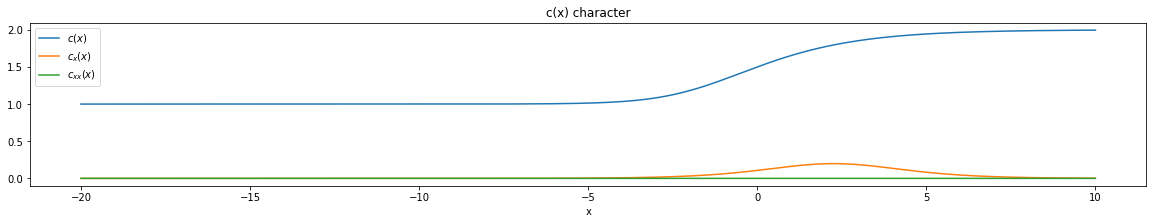

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


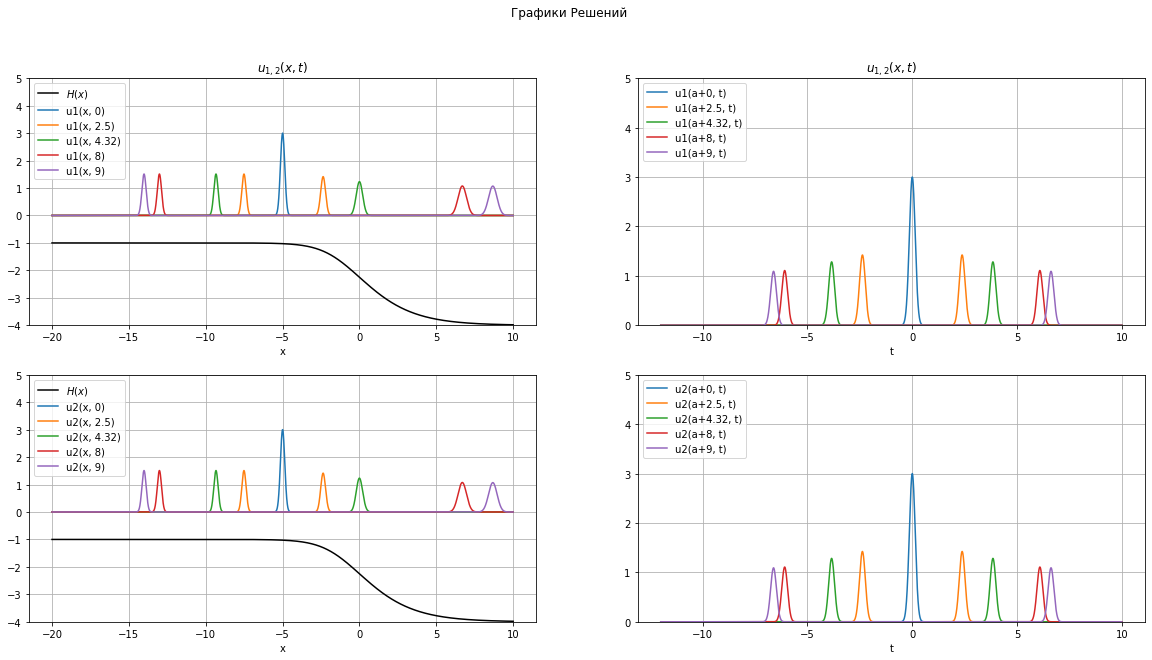

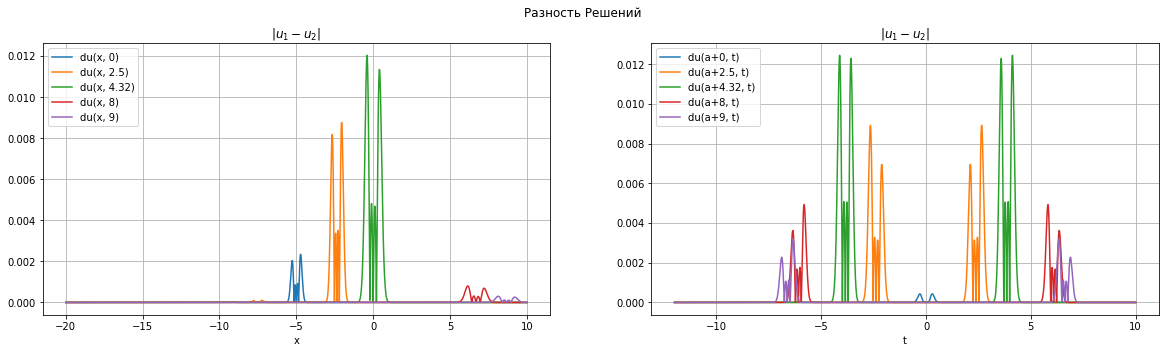

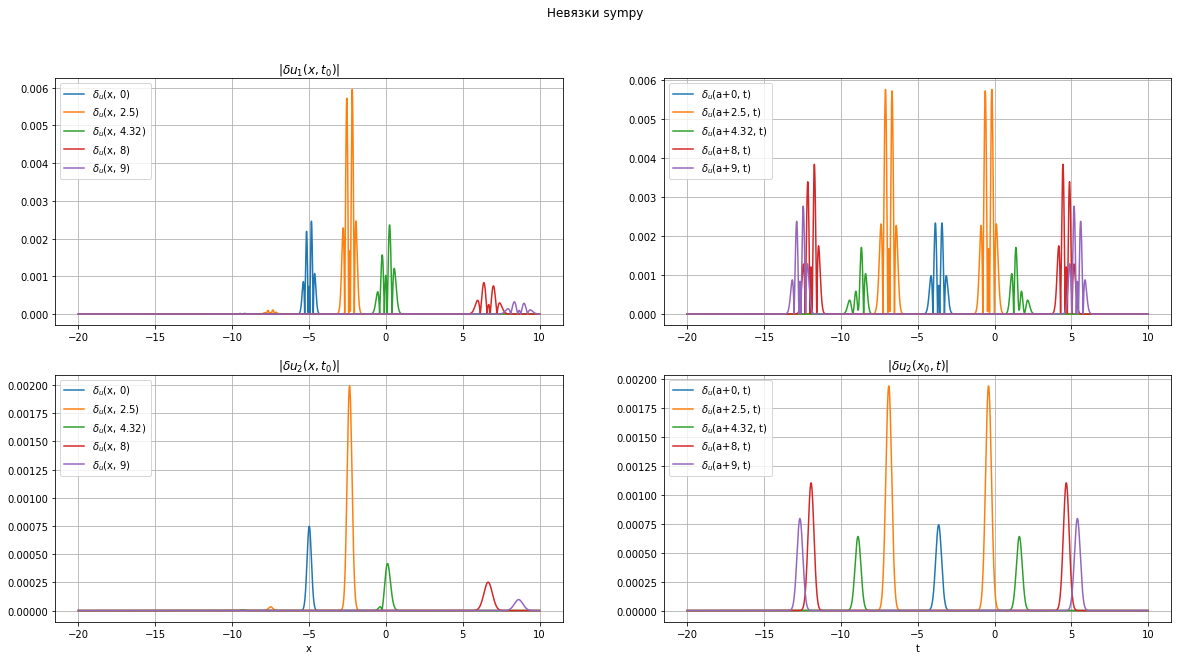

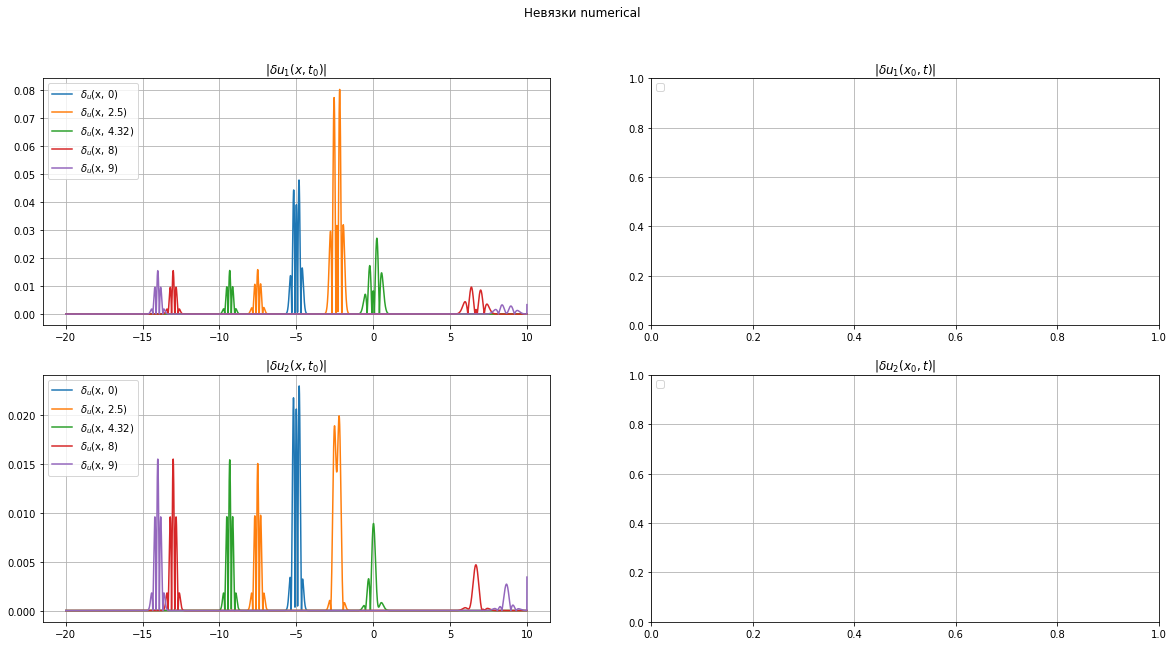

In [266]:
# Разность решений

du = lambda x, t: abs(u1(x, t) - u2(x, t))

def draw(t, axs, ay1s, ay2s, azs, az1s):
    global XX, TT
    # Построим графики зависимости невязки при фиксированном времени 
    axs[0].plot(XX, du(XX, t), label=f"du(x, {t})")   
    azs[0,0].plot(XX, du1_ss(XX, t), label=rf"$\delta_u$(x, {t})")
    azs[1,0].plot(XX, du2_ss(XX, t), label=rf"$\delta_u$(x, {t})")
    dt = np.mean(np.diff(TT))
    DU_num1 = abs(dU_num_x(u1, c, XX, t, dt))
    DU_num2 = abs(dU_num_x(u2, c, XX, t, dt))
    az1s[0, 0].plot(XX, DU_num1, label=rf"$\delta_u$(x, {t})")
    az1s[1, 0].plot(XX, DU_num2, label=rf"$\delta_u$(x, {t})")
    # Построим графики невязки при фиксированной координате
    axs[1].plot(TT, du(a+t, TT), label=f"du(a+{t}, t)")
    azs[0,1].plot(XX, du1_ss(a+t, TT), label=rf"$\delta_u$(a+{t}, t)")
    azs[1,1].plot(XX, du2_ss(a+t, TT), label=rf"$\delta_u$(a+{t}, t)")
    
    draw1(t, ay1s); draw2(t, ay2s)
    
def main():
    global a, mu, XX, TT
    dc = np.diff(c(X(1, TT)))
    dx = np.mean(np.diff(X(1, TT)))
    c_x = dc/dx
    ddc = np.diff(dc)
    c_xx = ddc/dx
    plt.figure(figsize=(20, 3))
    plt.title(r"c(x) character")
    plt.plot(XX, c(XX), label=r"$c(x)$")
    plt.xlabel("x")
    plt.plot(XX[0:len(XX)-1], c_x, label = r"$c_x(x)$")
    plt.plot(XX[1:len(XX)-1], c_xx, label = r"$c_{xx}(x)$")
    plt.legend()
    plt.show()

    fig1, axs = plt.subplots(2, 2, figsize=(20, 10))
    fig2, ays = plt.subplots(1, 2, figsize=(20, 5))
    fig3, azs = plt.subplots(2, 2, figsize=(20, 10))
    fig4, az1s = plt.subplots(2, 2, figsize=(20, 10))
    #set titles
    fig1.suptitle("Графики Решений")
    fig2.suptitle("Разность Решений")
    fig3.suptitle("Невязки sympy")
    fig4.suptitle("Невязки numerical")
    axs[0,0].set_title(r"$u_{1,2}(x,t)$"); axs[0, 1].set_title(r"$u_{1,2}(x,t)$")
    ays[0].set_title(r"$|u_1 - u_2|$");  ays[1].set_title(r"$|u_1 - u_2|$");
    azs[0, 0].set_title(r"$|\delta u_1(x, t_0)|$");  azs[1, 1].set_title(r"$|\delta u_1(x_0, t)|$");
    azs[1, 0].set_title(r"$|\delta u_2(x, t_0)|$");  azs[1, 1].set_title(r"$|\delta u_2(x_0, t)|$");
    az1s[0, 0].set_title(r"$|\delta u_1(x, t_0)|$");  az1s[0, 1].set_title(r"$|\delta u_1(x_0, t)|$");
    az1s[1, 0].set_title(r"$|\delta u_2(x, t_0)|$");  az1s[1, 1].set_title(r"$|\delta u_2(x_0, t)|$");
    #set axes labels
    axs[0,0].set_xlabel("x"); axs[0, 1].set_xlabel("t");
    axs[1,0].set_xlabel("x"); axs[1, 1].set_xlabel("t");
    ays[0].set_xlabel("x"); ays[1].set_xlabel("t");
    azs[1,0].set_xlabel("x"); azs[1, 1].set_xlabel("t");
    azs[1,0].set_xlabel("x"); azs[1, 1].set_xlabel("t");

    #set axes limits
    axs[0, 0].set_ylim([-4, 5]); axs[0, 1].set_ylim([0, 5]);
    axs[1, 0].set_ylim([-4, 5]); axs[1, 1].set_ylim([0, 5]);

    
    # plot H(x) - глубина бассейна
    axs[0][0].plot(XX, -H(XX), color="black", label=r"$H(x)$")
    axs[1][0].plot(XX, -H(XX), color="black", label=r"$H(x)$")

    # plotting
    T1 = [0, 2.5, 4.32, 8, 9]
    for t in T1:
        draw(t, ays, axs[0],axs[1], azs, az1s)

    axes = [axs, [ays], azs, az1s]
    for AXES in axes:
        for AXS in AXES:  
            for ax in AXS:
                ax.legend(loc=2) 
                ax.grid(True)
    
if __name__ == "__main__":
    a = -5
    mu = 0.2
    c_0 = c(a)
    XX=np.linspace(-20, 10, 10000)
    TT=np.linspace(-12, 10, 10000)
    main()

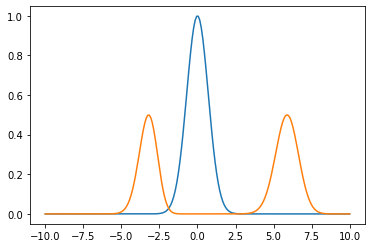

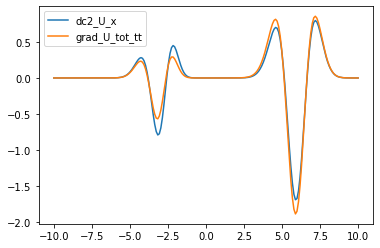

[1.48316138 1.5        1.51665178]
[[2.19976769 2.25       2.30023262]
 [2.19976769 2.25       2.30023262]
 [2.19976769 2.25       2.30023262]]


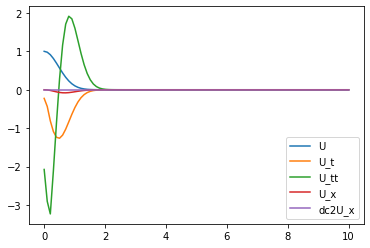

In [251]:
def c1(x):
    return 0.1*x
def u(x, t):
    return 0.5*(np.exp(-(x+c(x)*t)**2) + np.exp(-(x-c(x)*t)**2))
T = np.linspace(0, 10, 100)
dt = np.mean(np.diff(T))
X = np.linspace(-10, 10, 200)
dx = np.mean(np.diff(X))
t0 = 3
x0 = 0
plt.plot(X, u(X, 0))
plt.plot(X, u(X, t0))
plt.show()

def dU_num_x(u, c, X, t0, dt):
    U = u(X, t0)
    # t-> t+dt
    Udt = u(X, t0+dt)
    # t-> t-dt
    U_dt = u(X, t0-dt)
    U_tot=np.array([Udt, U, U_dt])
    #  вычисление первой производной по х
    U_x = np.gradient(U_tot, X, axis=1)[1]
    # вычисление произведения c(x)^2 * du/dx
    c2_U_x = c(X)*c(X)*U_x
    # вычисление d(c(x)^2 * du/dx)/dx
    dc2_U_x = np.gradient(c2_U_x, X)/2
    # du/dt
    grad_U_tot_t = np.gradient(U_tot, dt, axis=0)
    # ddu/dt^2
    grad_U_tot_tt = np.gradient(grad_U_tot_t, dt, axis=0)[0]
    plt.plot(X, dc2_U_x, label="dc2_U_x")
    plt.plot(X, grad_U_tot_tt, label="grad_U_tot_tt")
    plt.legend()
    plt.show()
    return grad_U_tot_tt - dc2_U_x

dU_num_x(u, c, X, t0, dt)

def dU_num_t(u, c, T, x0, dx):
    U = u(x0, T)
    plt.plot(T, U, label="U")
    U_t = np.gradient(U, T)
    U_tt = np.gradient(U_t, T)

    # x-> x-dx
    U_dx = u(x0-dx, T)
    # x-> x+dx
    Udx = u(x0+dx, T)
    X_tot = np.array([x0-dx, x0, x0+dx])
    C = c(X_tot)
    print(C)
    U_tot = np.array([U_dx, U, Udx])
    U_tot_x = np.gradient(U_tot, dx, axis=0)
    C2 = np.resize((C*C), (3, 3))
    print(C2)
    c2U_x = np.matmul(C2, U_tot_x)
    #print(c2U_x)
    dc2U_x = np.gradient(c2U_x, dx, axis=0)[0]
    plt.plot(T, U_t, label="U_t")
    plt.plot(T, U_tt, label="U_tt")
    plt.plot(T, U_tot_x[1], label="U_x")
    plt.plot(T, dc2U_x, label="dc2U_x")
    plt.legend()
    plt.show()
    
dU_num_t(u, c, T, x0, dx)